In [10]:
from openai import OpenAI
import dotenv
import base64
import os
import glob
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np


In [5]:
dotenv.load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

In [14]:
hesse_files = glob.glob("../data/korresp_hesse_ball_page*")
hesse_files_sorted = sorted(hesse_files)
print(hesse_files_sorted)

img_arr = []
for path in hesse_files_sorted:
    img_pil = Image.open(path)
    img_array = np.array(img_pil)
    img_arr.append(img_array)




['../data/korresp_hesse_ball_page_2.png', '../data/korresp_hesse_ball_page_3.png']


In [15]:
%matplotlib inline

def show_imgs(lis,col,size=15):
    row = -(-len(lis)//col)
    fig,ax = plt.subplots(row,col,figsize = (size,size))
    if row == 1:
        for i, img in enumerate(lis):
            ax[i].imshow(img)
    else:
        for i, img in enumerate(lis):
            j = i//col
            k = i%col
            ax[j][k].imshow(img)
    plt.show()

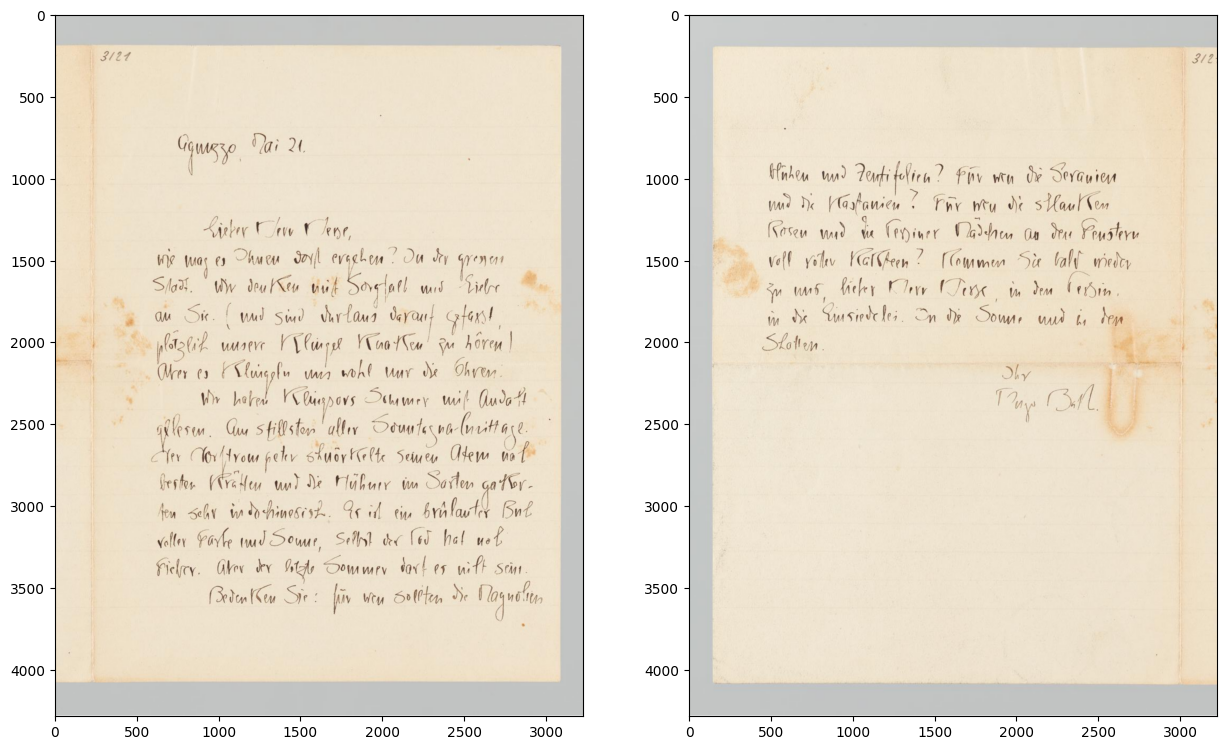

In [16]:
show_imgs(img_arr, 2, size=15)

In [19]:
def create_base64(img_path):
    with open(img_path, "rb") as f:
        image_data = f.read()
    
    return base64.b64encode(image_data).decode("utf-8")

In [20]:
def get_text(prompt, base64_img):
    response = client.chat.completions.create(
    model="gpt-4.1",
    messages=[{
        "role": "user",
        "content": [
            {"type": "text", "text": prompt},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/png;base64,{base64_img}"
                }
            },
        ],
    }],)
    return response.choices[0].message.content


In [27]:
# Im Prompt geben wir hier einen Kontext mit. 
prompt = """
Diese Bilder sind ein digitalisierter Brief von Hugo Ball an Hermann Hesse.
Bitte den Text in dem Bild transkribieren. Keine zusätzliche Sätze oder Information hinzufügen.
Wenn Sie unlesbare Schriftzeichen haben, schreiben Sie '[]' dafür
"""

In [25]:
text = ""
for img_p in hesse_files_sorted:
    base64_im = create_base64(img_p)
    text += get_text(prompt, base64_im)
    
    

In [26]:
print(text)

Agnuzzo, Mai 21.

Lieber Herr Hesse,
wie mag es Ihnen dort ergehen? In der grossen Stadt. Wir denken mit Sorgfalt und Liebe an Sie. (und sind überall darauf gefasst, plötzlich unserer Kleine Knochen zu hören! Aber es klirigen uns wohl nur die Ohren.
Wir haben Klempors Sommer mit Andacht gelesen. Am stillsten aller Sonntagnachmittage. Der Chlorrongeko schürkte seinen Atem nach besten Kräften und die Hühner im Garten gackerten sehr indignisiert. Es ist ein Frühlauts Buch voller Farbe und Sommer, selbst der Tod hat noch Federn. Aber der letzte Sommer darf es nicht sein.
Bedenken Sie: für wen sollten die Magnolienblühen und Zentifolien? Für wen die Geranien  
und die Kastanien? Für wen die stahlnen  
Rosen und die kleinen Mädchen an den Fenstern  
voll roter Kätzchen? Kommen Sie bald wieder  
zu uns, lieber Herr Hesse, in den Tessin,  
in die Einsiedelei. In die Sonne und in den  
Schatten.

Ihr  
Hugo Ball.


"Klempors Sommer" = "Klingsors letzter Sommer"